In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import seaborn as sns
#import pylusat.density
from sklearn.neighbors import KernelDensity
import rasterio as rio
from shapely.ops import unary_union
#import geoplot

In [4]:
#!pip install geoplot

## Loading and Reprojecting Data

### Parks

In [5]:
parks_gdf = gpd.read_file('Final Data/seattle_parks')
parks_gdf.head()

,NAME,geometry
0,12TH AVE SQUARE PARK,"POLYGON ((-122.31625 47.60714, -122.31625 47.6..."
1,14TH AVENUE NW BOAT RAMP,"POLYGON ((-122.37380 47.66139, -122.37380 47.6..."
2,17TH AVENUE NE CENTERSTRIP,"MULTIPOLYGON (((-122.30952 47.66651, -122.3095..."
3,3001 E MADISON,"POLYGON ((-122.29280 47.62507, -122.29283 47.6..."
4,48TH AVE SW/SW CHARLESTOWN ST,"POLYGON ((-122.39356 47.56986, -122.39356 47.5..."


In [6]:
#Use centroid and project
parks_gdf_proj = parks_gdf.to_crs('EPSG:32610')
parks_gdf_proj['geometry'] = parks_gdf_proj['geometry'].centroid

### Retail

In [7]:
retail_gdf= gpd.read_file('Final Data/seattle_retail')
retail_gdf.head()

,shop,name,geometry
0,books,University Book Store,POINT (-122.31298 47.66040)
1,car_repair,Midas,POINT (-122.30147 47.70906)
2,supermarket,Grocery Outlet,POINT (-122.29521 47.72164)
3,car,Pierre Chevrolet,POINT (-122.30051 47.71129)
4,bakery,Cupcake Royale,POINT (-122.38656 47.56122)


In [8]:
retail_gdf_proj = retail_gdf.to_crs('EPSG:32610')
retail_gdf_proj['geometry'] = retail_gdf_proj['geometry'].centroid

### Culture, Leisure, Amenities

In [9]:
cla_gdf = gpd.read_file('Final Data/culture_leisure_amenities')
cla_gdf.head()

,amenity,name,geometry
0,slipway,None,POINT (-122.27676 47.57115)
1,slipway,None,POINT (-122.29946 47.64835)
2,slipway,Ferdinand Street Boat Launch,POINT (-122.26151 47.55734)
3,slipway,None,POINT (-122.39745 47.54028)
4,picnic_table,None,POINT (-122.33925 47.69838)


In [10]:
cla_gdf_proj = cla_gdf.to_crs('EPSG:32610')
cla_gdf_proj.geometry.geom_type.unique()

array(['Point', 'Polygon', 'LineString', 'MultiPolygon'], dtype=object)

In [11]:
cla_gdf_proj = cla_gdf_proj[cla_gdf_proj.geometry.geom_type != 'LineString']

In [12]:
cla_gdf_proj['geometry'] = cla_gdf_proj['geometry'].centroid

### Transit

In [13]:
transit_gdf= gpd.read_file('Final Data/Seattle_Transit_Stops')
transit_gdf.head()

,OBJECTID,CHANGE_NUM,MINOR_CHANGE_NUM,ACCESSIBILITY_DECAL,ACCESSORY_SIGN,STOP_ID,TRANS_LINK_ID,STOP_STATUS,STOP_TYPE,AUTH_CODE,...,ON_STREET_NAME,ROUTESIGN,ROUTESIGN_OWNER,SIGN_MOUNTING_DIR,SIGNPOST,SIGNPOST_ANCHOR,SCHEDULE_HOLDER,NUM_SHELTERS,GISOBJID,geometry
0,20215,150,0,UNK,Unknown,26150,79389,CLO,REG,UNK,...,37th Ave NE,Unknown,UNK,None,Unknown,Unknown,UNK,0,100015310.0,POINT (-122.28871 47.72321)
1,5310,149,10,UNK,Unknown,26150,79389,CLO,REG,UNK,...,37th Ave NE,Unknown,UNK,None,Unknown,Unknown,UNK,0,100015310.0,POINT (-122.28871 47.72321)
2,13882,149,10,YES,None,76730,18073,ACT,REG,SEA,...,Lake City Way NE,A2 <=6 rts,KCM,Away,Light,Unknown,Double,1,8074.0,POINT (-122.29289 47.72333)
3,15134,150,0,YES,None,76730,18073,ACT,REG,SEA,...,Lake City Way NE,A2 <=6 rts,KCM,Away,Light,Unknown,Double,1,8074.0,POINT (-122.29289 47.72333)
4,22355,150,0,UNK,Unknown,38659,29894,ACT,LAY,UNK,...,35th Ave NE,Unknown,UNK,None,Unknown,Unknown,UNK,0,100016122.0,POINT (-122.29095 47.72339)


In [14]:
transit_gdf_proj = transit_gdf.to_crs('EPSG:32610')

### Sidewalks

In [15]:
sidewalks_gdf= gpd.read_file('Final Data/seattle_sidewalks')
sidewalks_gdf.head()

,geometry
0,"LINESTRING (-122.37013 47.70341, -122.37136 47..."
1,"LINESTRING (-122.37373 47.65556, -122.37448 47..."
2,"LINESTRING (-122.37171 47.65470, -122.37232 47..."
3,"LINESTRING (-122.37152 47.65484, -122.37214 47..."
4,"LINESTRING (-122.36763 47.65230, -122.37005 47..."


In [16]:
sidewalks_gdf_proj = sidewalks_gdf.to_crs('EPSG:32610')

In [17]:
sidewalks_gdf_proj=sidewalks_gdf_proj.dropna()

In [18]:
sidewalks_gdf_proj.to_file('seattle_sidewalks_proj')

In [17]:
#ped_density = pylusat.density.of_line(sidewalks_gdf_proj,sidewalks_gdf_proj,search_radius='800 meters')

In [18]:
#sidewalks_gdf_proj['ped_density'] = ped_density

NameError: name 'ped_density' is not defined

In [19]:
test = sidewalks_gdf_proj['geometry'][:3]
test

0    LINESTRING (547253.884 5283528.262, 547162.044...
1    LINESTRING (547026.699 5278208.530, 546971.126...
2    LINESTRING (547179.633 5278113.482, 547132.962...
Name: geometry, dtype: geometry

In [20]:
test1 = test.copy()
test1

0    LINESTRING (547253.884 5283528.262, 547162.044...
1    LINESTRING (547026.699 5278208.530, 546971.126...
2    LINESTRING (547179.633 5278113.482, 547132.962...
Name: geometry, dtype: geometry

In [28]:
distance_delta = 800
for i in range(len(test)):
    distances = np.arange(0, test[i].length, distance_delta)
    points = [test[i].interpolate(distance) for distance in distances] + [test[i].boundary.geoms[1]]
    multipoint = unary_union(points)
    test1[i] = multipoint
    print('.',end='')


...

In [22]:
ped_net_geo_line = sidewalks_gdf_proj['geometry']

In [42]:
ped_net_geo_line.geometry.geom_type.unique()

array(['LineString', 'MultiLineString'], dtype=object)

In [54]:
ped_net_geo_line=ped_net_geo_line[ped_net_geo_line.geom_type != 'MultiLineString']

In [56]:
ped_net_geo_mpoint = ped_net_geo_line.copy()

In [ ]:
distance_delta = 800
for i in range(len(ped_net_geo_line)):
    distances = np.arange(0, ped_net_geo_line.iloc[i].length, distance_delta)
    points = [ped_net_geo_line.iloc[i].interpolate(distance) for distance in distances] + [ped_net_geo_line.iloc[i].boundary.geoms[1]]
    multipoint = unary_union(points)
    ped_net_geo_mpoint[i] = multipoint
    #print(i,end='')

In [59]:
ped_points = []
for i in range(len(ped_net_geo_mpoint)):
    for x in range(len(ped_net_geo_mpoint[i].geoms)):
        ped_points.append(ped_net_geo_mpoint[i].geoms[x])

AttributeError: 'LineString' object has no attribute 'geoms'

In [60]:
ped_points_gdf = gpd.GeoSeries(data=ped_points)

In [61]:
ped_points_gdf.to_file('ped_points',driver='GeoJSON')

### Neighborhoods

In [65]:
hood_gdf = gpd.read_file('Neighborhoods_Community_Reporting_Areas.geojson')

In [68]:
hood_gdf = hood_gdf[['GEN_ALIAS','geometry']]

In [70]:
hood_gdf_proj = hood_gdf.to_crs('EPSG:32610')

<AxesSubplot:>

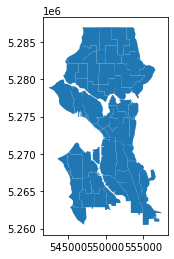

In [71]:
hood_gdf_proj.plot()

## Analysis

### Parks

<AxesSubplot:>

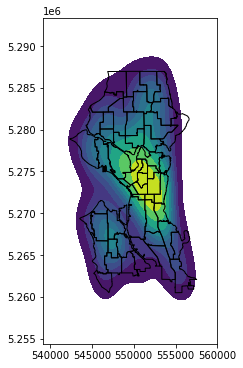

In [84]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(data=parks_gdf_proj,x=parks_gdf_proj.geometry.x,y=parks_gdf_proj.geometry.y,shade=True, cmap='viridis')
hood_gdf_proj.plot(ax=ax,facecolor='none', edgecolor='k')

### Retail

<AxesSubplot:>

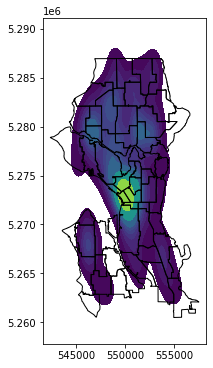

In [85]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(data=retail_gdf_proj,x=retail_gdf_proj.geometry.x,y=retail_gdf_proj.geometry.y,shade=True, cmap='viridis')
hood_gdf_proj.plot(ax=ax,facecolor='none', edgecolor='k')

### Transit

<AxesSubplot:>

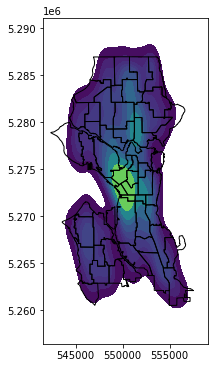

In [87]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(data=transit_gdf_proj,x=transit_gdf_proj.geometry.x,y=transit_gdf_proj.geometry.y,shade=True, cmap='viridis')
hood_gdf_proj.plot(ax=ax,facecolor='none', edgecolor='k')

### Amenities, Culture, and Entertainment

<AxesSubplot:>

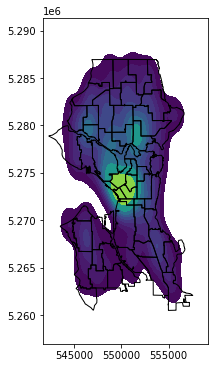

In [88]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(data=cla_gdf_proj,x=cla_gdf_proj.geometry.x,y=cla_gdf_proj.geometry.y,shade=True, cmap='viridis')
hood_gdf_proj.plot(ax=ax,facecolor='none', edgecolor='k')

### Pedestrian Network

<AxesSubplot:>

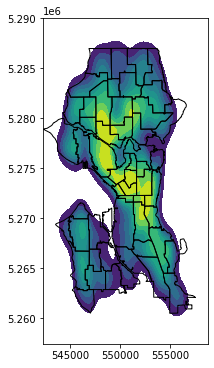

In [89]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(data=ped_points_gdf,x=ped_points_gdf.geometry.x,y=ped_points_gdf.geometry.y,shade=True, cmap='viridis')
hood_gdf_proj.plot(ax=ax,facecolor='none', edgecolor='k')